## DISCLAIMER: 3D Plotting does not work in colab. Recommend local machine

In [71]:
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from importlib import reload
from PIL import Image

from HandDataset import *
from Networks import *

manualSeed = 42
random.seed(manualSeed)
torch.manual_seed(manualSeed)
np.random.seed(manualSeed)

In [72]:
real_transform = transforms.Compose([
    transforms.CenterCrop(112),
    transforms.Resize(64),
    #transforms.ToTensor(),
    #transforms.Normalize((.5,.5,.5),(.5,.5,.5)) # (replace with actual mean and std)
])


ds = HandDataset(
    img_dir='C:/Users/lucas/OneDrive - University of Glasgow/Glasgow/FreiHAND_split/evaluation/color',
    mask_dir='C:/Users/lucas/OneDrive - University of Glasgow/Glasgow/FreiHAND_split/evaluation/mask',
    anno_path='C:/Users/lucas/OneDrive - University of Glasgow/Glasgow/FreiHAND_split/FreiHAND_anno_training.pickle', # incomplete (only contains xyz data)
    zfill=8,
    ext='.jpg',
    black_size=224,
    masked=True,
    transform=real_transform,
    normalise=False
)

In [66]:
i = 25555
hand = ds[i]
uv = anno[i]['uv_vis']

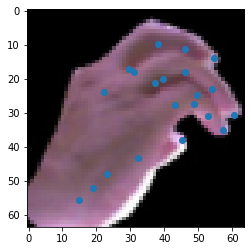

In [67]:
plt.imshow(hand[0])
plt.scatter(uv[:,0], uv[:,1])

In [68]:
k = hand[1]

<IPython.core.display.Javascript object>


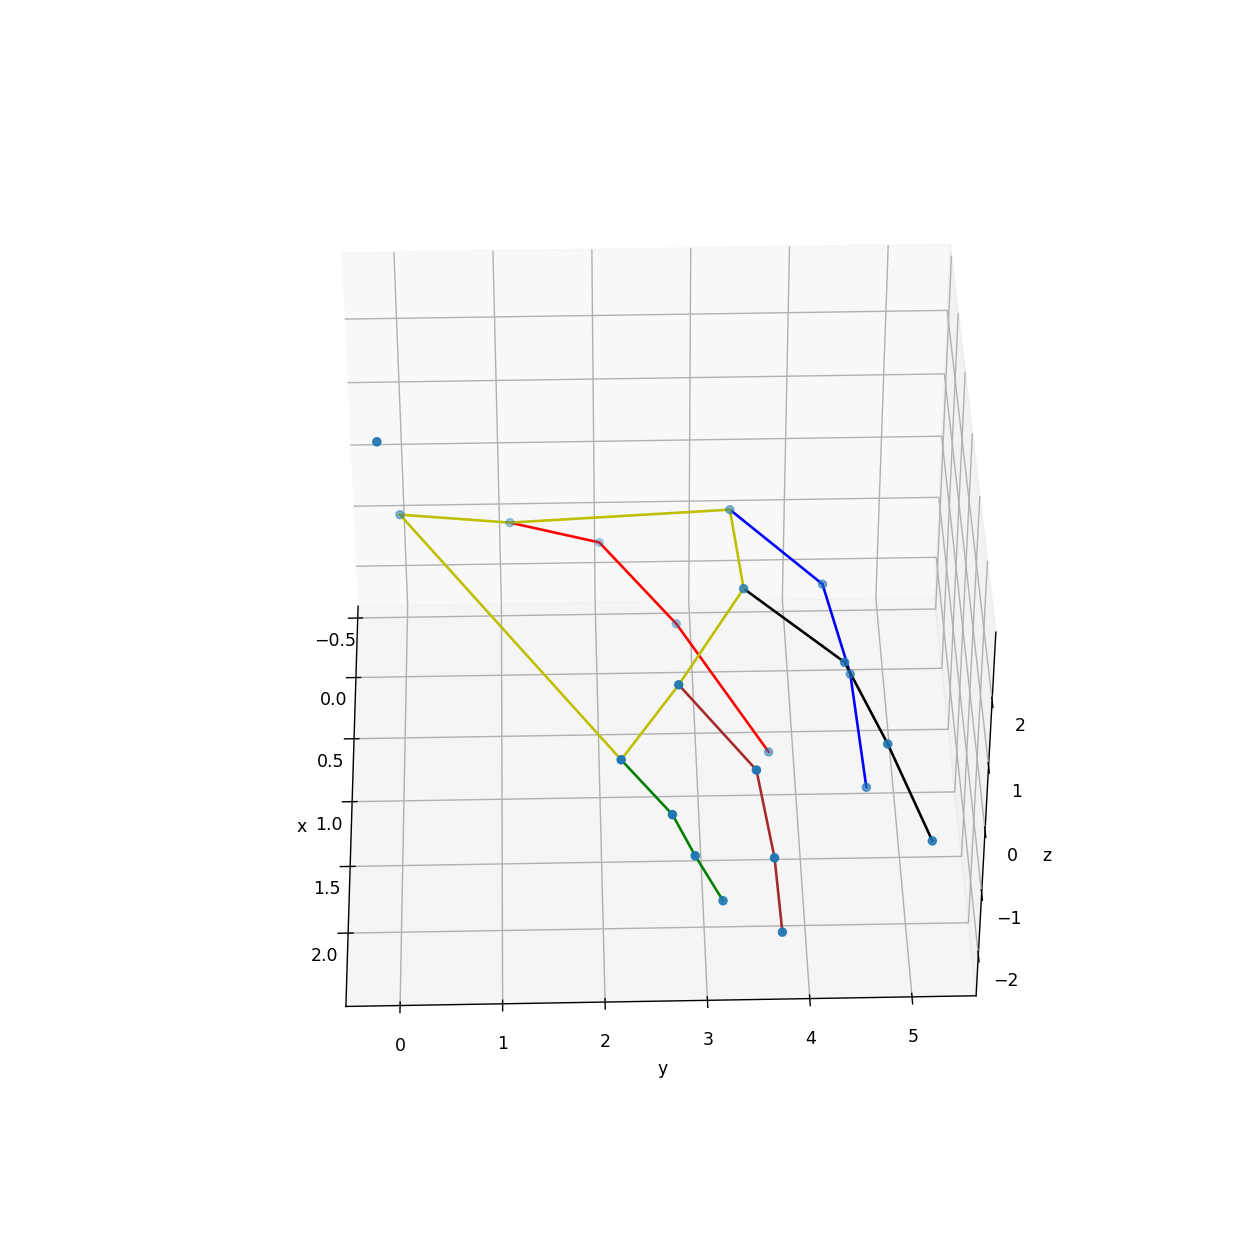

In [69]:
%matplotlib notebook
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.view_init(azim=0, elev=90)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(k[:, 0], k[:, 1], k[:, 2])
plotHand3D(ax, k[:, 0], k[:, 1], k[:, 2])
plt.show()

Following cells ensure both datasets have consistent coordinate systems...

In [88]:
# permutation = [0,4,3,2,1,8,7,6,5,12,11,10,9,16,15,14,13,20,19,18,17,21,25,24,23,22,29,28,27,26,33,32,31,30,37,36,35,34,41,40,39,38]

In [70]:
import json

f = open('C:/Users/lucas/Downloads/FreiHAND_pub_v2/training_xyz.json')
xyz = json.load(f)

f = open('C:/Users/lucas/Downloads/FreiHAND_pub_v2/training_K.json')
k = json.load(f)

def projectPoints(xyz, K):
    """ Project 3D coordinates into image space. """
    xyz = np.array(xyz)
    K = np.array(K)
    uv = np.matmul(K, xyz.T).T
    return uv[:, :2] / uv[:, -1:]

In [98]:
# import copy
# anno_fix = copy.deepcopy(anno_all)

In [99]:
# for i in range(len(anno_all)):
#     anno_fix[i]['xyz'] = anno_all[i]['xyz'][permutation]
#     anno_fix[i]['uv_vis'] = anno_all[i]['uv_vis'][permutation]
#     anno_fix[i]['K'] = anno_all[i]['K']

In [100]:
# with open('C:/Users/lucas/OneDrive - University of Glasgow/Glasgow/RHD_published_v2/evaluation/anno_eval_fixed.pickle', 'wb') as handle:
#     pickle.dump(anno_fix, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [76]:
left = 56
top = 56

anno = {}
uv = np.ones((21,3))

for i in range(24420, 32560):
    uv = np.ones((21,3))
    uv[:,:2] = projectPoints(xyz[i], k[i])
    uv[:,:2] -=(left,top) 
    greater_min = np.all(uv >= 0, axis=1)
    lesser_max = np.all(uv < 112, axis=1)
    uv[:,2] = np.logical_and(greater_min, lesser_max).astype(np.float32)
    uv[:,:2] *= 64/112
    
    image,xyz_rel,mask = ds[i]
    
    image.save(f'C:/Users/lucas/Desktop/FreiHAND_ready/evaluation/color/{str(i).zfill(5)}.png')
    mask.save(f'C:/Users/lucas/Desktop/FreiHAND_ready/evaluation/mask/{str(i).zfill(5)}.png')
    
    anno[i]={'xyz':None,'uv_vis':None}
    anno[i]['xyz']=xyz_rel
    anno[i]['uv_vis'] = uv


In [77]:
with open('C:/Users/lucas/Desktop/FreiHAND_ready/evaluation/anno_evaluation.pickle', 'wb') as handle:
    pickle.dump(anno, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [32]:
# anno = {}

# for i,hand in enumerate(ds):
#     _,_,mask = hand
#     #anno[i]={'xyz':None,'uv_vis':None,'k':None}
#     #anno[i]['xyz'] = kp_coord_xyz
#     #anno[i]['uv_vis'] = np.hstack((hand[2],hand[3][:,None]))
#     #img = Image.fromarray(np.transpose((((image+1)/2)*255).numpy().astype(np.uint8), axes=[1,2,0]))
    
#     #img.save(f'C:/Users/lucas/Desktop/RHD_ready/training/color/{str(i).zfill(5)}.png')
#     mask.save(f'C:/Users/lucas/Desktop/RHD_ready/training/mask/{str(i).zfill(5)}.png')

C:\Users\lucas\OneDrive - University of Glasgow\MyDrive\Colab Notebooks\Project\Rotations.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  theta = atan( -a[2] / a[1] ) # rotation about x


Exception: help! No hand visible! Check idx 24453